### Problem

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2$$


In [1]:
import numpy as np

In [ ]:
# calculate the gradient of each weight
def df_w(w):
    dW = np.array((0.2 * w[0], 4 * w[1]))
    return dW

#### Gradient Descent

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. In machine learning, it's commonly used to minimize the cost/loss function and find the optimal parameters for a model.

1. Start with initial parameters: Begin with random or zero initialization of model parameters.

2. Calculate the gradient: Compute the gradient (partial derivatives) of the cost function with respect to each parameter.

3. Update parameters: Move in the opposite direction of the gradient (since we want to minimize the function).

4. Repeat: Continue this process until convergence (minimal change in parameters or cost function).

$$θ = θ - α * ∇J(θ)$$

Stochastic Gradient Descent (SGD) is a variant of gradient descent where the model parameters are updated using only a single training example at a time. This can lead to faster convergence and is often used in large datasets.


In [ ]:
def sgd(W, dW, lr):
    W = W - lr * dW
    return W


def train_p1(optimizer, lr, epochs):
    # initial point
    W = np.array([-5, -2], dtype=np.float32)
    results = [W]
    for e in range(epochs):
        dW = df_w(W)
        W = optimizer(W, dW, lr)
        results.append(W)
    return results

In [5]:
train_p1(sgd, 0.4, 30)

[array([-5., -2.], dtype=float32),
 array([-4.6,  1.2]),
 array([-4.232, -0.72 ]),
 array([-3.89344,  0.432  ]),
 array([-3.5819648, -0.2592   ]),
 array([-3.29540762,  0.15552   ]),
 array([-3.03177501, -0.093312  ]),
 array([-2.78923301,  0.0559872 ]),
 array([-2.56609437, -0.03359232]),
 array([-2.36080682,  0.02015539]),
 array([-2.17194227, -0.01209324]),
 array([-1.99818689,  0.00725594]),
 array([-1.83833194, -0.00435356]),
 array([-1.69126538,  0.00261214]),
 array([-1.55596415, -0.00156728]),
 array([-1.43148702e+00,  9.40369969e-04]),
 array([-1.31696806e+00, -5.64221981e-04]),
 array([-1.21161061e+00,  3.38533189e-04]),
 array([-1.11468176e+00, -2.03119913e-04]),
 array([-1.02550722e+00,  1.21871948e-04]),
 array([-9.43466646e-01, -7.31231688e-05]),
 array([-8.67989314e-01,  4.38739013e-05]),
 array([-7.98550169e-01, -2.63243408e-05]),
 array([-7.34666155e-01,  1.57946045e-05]),
 array([-6.75892863e-01, -9.47676268e-06]),
 array([-6.21821434e-01,  5.68605761e-06]),
 array([-

### RMSProp

RMSProp (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to improve the performance of gradient descent. It adjusts the learning rate for each parameter based on the average of recent gradients, allowing for faster convergence and better handling of non-stationary objectives.

1. Initialize parameters: Start with random or zero initialization of model parameters.

2. Initialize moving average: Create a moving average of the squared gradients for each parameter.

3. Compute gradients: Calculate the gradients of the cost function with respect to each parameter.

4. Update moving average: Update the moving average of the squared gradients using a weighted average of the current gradient and the previous moving average.

5. Update parameters: Update each parameter by subtracting the product of the learning rate, the gradient, and the inverse square root of the moving average of the squared gradients.

6. Repeat: Continue this process until convergence (minimal change in parameters or cost function).


In [ ]:
def RMSProp(W, dW, lr, S, gamma):
    epsilon = 1e-6
    S = gamma * S + (1 - gamma) * dW**2
    adaptive_lr = lr / (np.sqrt(S) + epsilon)
    W = W - adaptive_lr * dW
    return W, S


def train_p2(optimizer, lr, epochs):
    # initial point
    W = np.array([-5, -2], dtype=np.float32)
    results = [W]
    S = np.zeros_like(W)
    for e in range(epochs):
        dW = df_w(W)
        W, S = optimizer(W, dW, lr, S, gamma=0.9)
        results.append(W)
    return results

In [8]:
train_p2(RMSProp, 0.3, 30)

[array([-5., -2.], dtype=float32),
 array([-4.0513197 , -1.05131708]),
 array([-3.43519553, -0.59152376]),
 array([-2.95893489, -0.3294397 ]),
 array([-2.56546089, -0.17756504]),
 array([-2.22920358, -0.09163272]),
 array([-1.93626564, -0.04494508]),
 array([-1.67817504, -0.02081429]),
 array([-1.44934809, -0.00903562]),
 array([-1.24588029, -0.00364592]),
 array([-1.06490135, -0.00135352]),
 array([-9.04200650e-01, -4.56447225e-04]),
 array([-7.61994932e-01, -1.37563947e-04]),
 array([-6.36776983e-01, -3.62604278e-05]),
 array([-5.27213771e-01, -8.11346375e-06]),
 array([-4.32077091e-01, -1.47475425e-06]),
 array([-3.50197152e-01, -2.02787524e-07]),
 array([-2.80433359e-01, -1.84235524e-08]),
 array([-2.21658617e-01, -7.67771777e-10]),
 array([-1.72754375e-01,  7.80432778e-12]),
 array([-1.32614084e-01, -5.05777072e-13]),
 array([-1.00152823e-01,  6.19098174e-14]),
 array([-7.43209130e-02, -1.13368674e-14]),
 array([-5.41193712e-02,  2.80153177e-15]),
 array([-3.86152607e-02, -8.81296

### Adam

Adam (Adaptive Moment Estimation) is an advanced optimization algorithm that combines the benefits of both RMSProp and momentum. It adapts the learning rate for each parameter based on the first and second moments of the gradients, allowing for faster convergence and better handling of sparse gradients.

1. Initialize parameters: Start with random or zero initialization of model parameters.
2. Initialize first and second moment estimates: Initialize two arrays, m and v, to store the first and second moment estimates of the gradients, respectively. Set both arrays to zero.
3. Compute gradients: Calculate the gradients of the cost function with respect to each parameter.
4. Update first moment estimate: Update the first moment estimate (m) using a weighted average of the current gradient and the previous first moment estimate.
5. Update second moment estimate: Update the second moment estimate (v) using a weighted average of the squared gradients and the previous second moment estimate.
6. Bias correction: Apply bias correction to the first and second moment estimates to account for their initialization at zero.
7. Update parameters: Update the parameters using the adapted learning rate, which is calculated based on the first and second moment estimates.
8. Repeat: Continue this process until convergence (minimal change in parameters or cost function).


In [ ]:
def Adam(W, dW, lr, V, S, beta1, beta2, t):
    epsilon = 1e-6
    V = beta1 * V + (1 - beta1) * dW
    S = beta2 * S + (1 - beta2) * dW**2
    V_corrected = V / (1 - beta1**t)
    S_corrected = S / (1 - beta2**t)
    adaptive_lr = lr / (np.sqrt(S_corrected) + epsilon)
    W = W - adaptive_lr * V_corrected
    return W, V, S


def train_p3(optimizer, lr, epochs):
    # initial point
    W = np.array([-5, -2], dtype=np.float32)
    results = [W]
    V = np.zeros_like(W)
    S = np.zeros_like(W)
    for e in range(epochs):
        dW = df_w(W)
        W, V, S = optimizer(W, dW, lr, V, S, beta1=0.9, beta2=0.999, t=e + 1)
        results.append(W)
    return results

In [10]:
train_p3(Adam, 0.2, 30)

[array([-5., -2.], dtype=float32),
 array([-4.8000002 , -1.80000002]),
 array([-4.60025478, -1.60082451]),
 array([-4.40094848, -1.40317262]),
 array([-4.20227764, -1.20787822]),
 array([-4.00445033, -1.01592745]),
 array([-3.80768638, -0.82847307]),
 array([-3.61221732, -0.64684159]),
 array([-3.41828623, -0.47252765]),
 array([-3.22614739, -0.30716934]),
 array([-3.03606592, -0.15249855]),
 array([-2.84831706, -0.01026326]),
 array([-2.66318543,  0.11787552]),
 array([-2.480964  ,  0.23046161]),
 array([-2.30195279,  0.3263587 ]),
 array([-2.12645742,  0.40484195]),
 array([-1.95478732,  0.46564961]),
 array([-1.7872537 ,  0.50898799]),
 array([-1.62416726,  0.53549442]),
 array([-1.46583566,  0.54617144]),
 array([-1.31256067,  0.54230812]),
 array([-1.16463526,  0.52540206]),
 array([-1.02234036,  0.4970906 ]),
 array([-0.88594163,  0.4590951 ]),
 array([-0.75568617,  0.41317781]),
 array([-0.63179919,  0.3611089 ]),
 array([-0.51448089,  0.30464048]),
 array([-0.40390346,  0.24548

### Vanishing Gradient Problem

The vanishing gradient problem occurs when the gradients of the loss function become very small during backpropagation, leading to slow or stalled learning. This is particularly common in deep neural networks with many layers, where the gradients can diminish exponentially as they propagate backward through the network. Additionally, it can occur when using activation functions like the sigmoid or tanh, which have gradients that approach zero for large or small input values.


In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)

In [12]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [ ]:
train_dataset = FashionMNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26421880/26421880 [00:02<00:00, 12829468.39it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1304009.97it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw


100%|██████████| 4422102/4422102 [00:00<00:00, 11139750.55it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5154518.26it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



#### Modeling


In [14]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out

In [15]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
print(model)

MLP(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=128, bias=True)
  (layer5): Linear(in_features=128, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


#### Training using SGD


In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []
for epoch in range(num_epochs):
    model.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1) == y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(
        f"Epoch {epoch + 1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}"
    )

Epoch 1/300, Train_Loss: 2.3096, Train_Acc: 0.0999, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 2/300, Train_Loss: 2.3028, Train_Acc: 0.0981, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 3/300, Train_Loss: 2.3028, Train_Acc: 0.0995, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 4/300, Train_Loss: 2.3028, Train_Acc: 0.0978, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 5/300, Train_Loss: 2.3028, Train_Acc: 0.0994, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 6/300, Train_Loss: 2.3028, Train_Acc: 0.0990, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 7/300, Train_Loss: 2.3028, Train_Acc: 0.0980, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 8/300, Train_Loss: 2.3028, Train_Acc: 0.0989, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 9/300, Train_Loss: 2.3027, Train_Acc: 0.1003, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 10/300, Train_Loss: 2.3028, Train_Acc: 0.0997, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 11/300, Train_Loss: 2.3028, Train_Acc: 0.0979, Validation Loss:

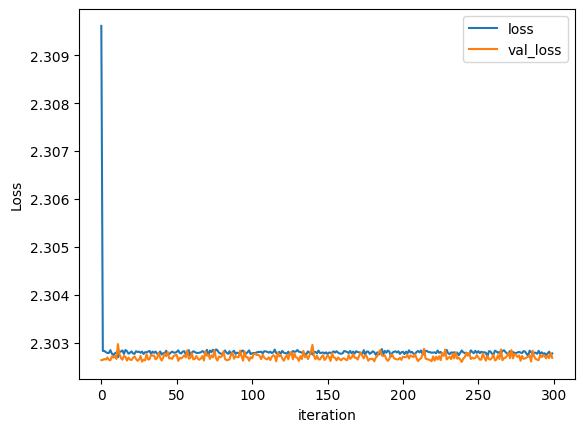

In [ ]:
plt.plot(train_losses, label="loss")
plt.plot(val_losses, label="val_loss")
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend()

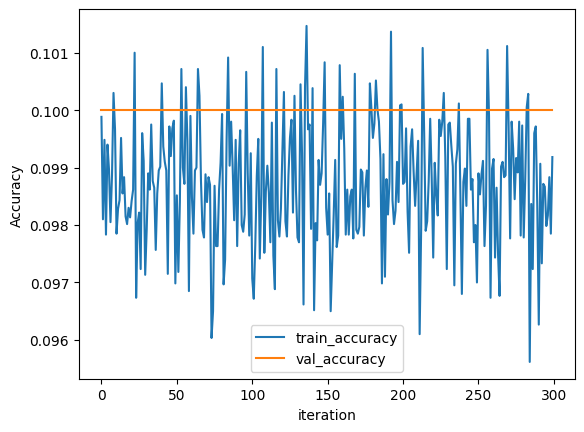

In [ ]:
plt.plot(train_acc, label="train_accuracy")
plt.plot(val_acc, label="val_accuracy")
plt.xlabel("iteration")
plt.ylabel("Accuracy")
plt.legend()